In [13]:
import pandas as pd

data = pd.read_csv("../Data/Processed/processed.csv")

In [14]:
from sklearn.cluster import KMeans
 
method_used = KMeans

In [15]:

from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2,30):
    pred = method_used(n_clusters=i).fit_predict(data)
    silhouette_scores.append(silhouette_score(data, pred))  

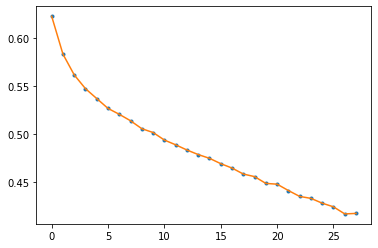

In [18]:
import matplotlib.pyplot as plt

plt.plot(silhouette_scores, '.', silhouette_scores)